# 코드

In [1]:
# 필요 라이브러리 호출
import sklearn.datasets as d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 머신러닝 알고리즘 호출
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 평가지표 호출
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 정규화
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer

In [2]:
# 데이터 불러오기
cancer_data = d.load_breast_cancer()

X_data = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
X_data = MinMaxScaler().fit_transform(X_data)
y_label = pd.DataFrame(cancer_data.target)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

# 과제 1

로지스틱 회귀의 Training data의 confusion matrix


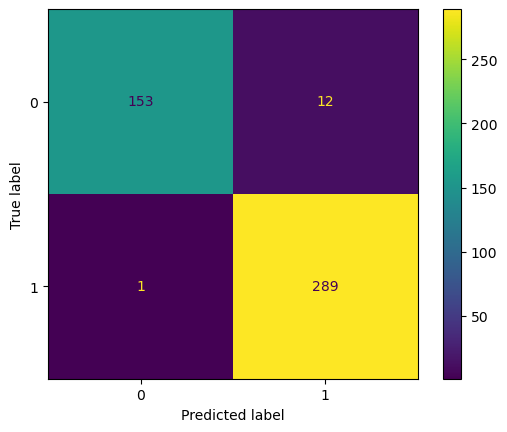

In [3]:
lr_clf = LogisticRegression(solver='newton-cg', random_state=0).fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(lr_clf, X_train, y_train)
print('로지스틱 회귀의 Training data의 confusion matrix')
plt.show()

로지스틱 회귀의 Test data의 confusion matrix


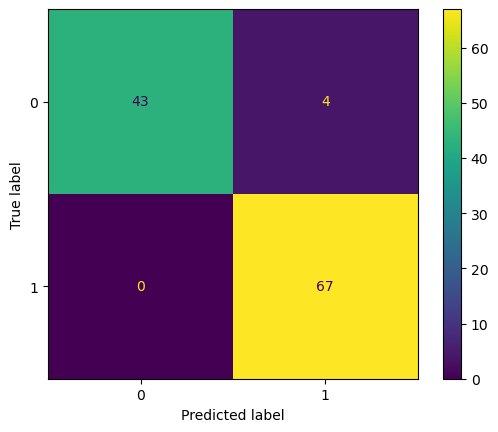

In [4]:
# 과제 1
# 아래 Confusion Matrix의 accuracy, precision, recall, f1-score를 계산하라

y_pred = lr_clf.predict(X_test)

print('로지스틱 회귀의 Test data의 confusion matrix')
ConfusionMatrixDisplay.from_estimator(lr_clf, X_test, y_test)
plt.show()

## 과제 1

- Accuracy: \~\~\~\~\~\~\~\~\~\~
- Precision: \~\~\~\~\~\~\~\~\~\~
- Recall: \~\~\~\~\~\~\~\~\~\~
- F1-score: \~\~\~\~\~\~\~\~\~\~

# 과제 2

In [5]:
dt_clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
svm_clf = SVC(kernel='rbf', random_state=0).fit(X_train, y_train)
lr_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

dt_pred = dt_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)

DecisionTreeClassifier(random_state=0)


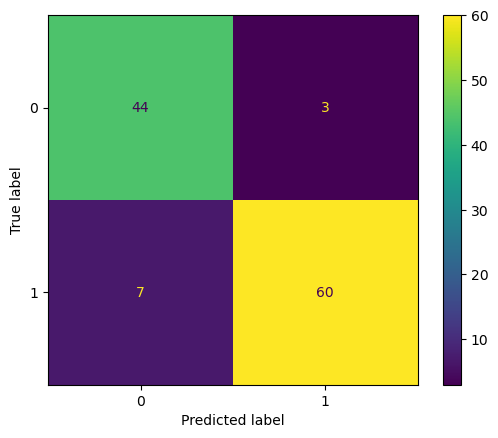

DecisionTreeClassifier(random_state=0)의 precision: 0.952
DecisionTreeClassifier(random_state=0)의 recall: 0.896
--------------------------------------------------
SVC(random_state=0)


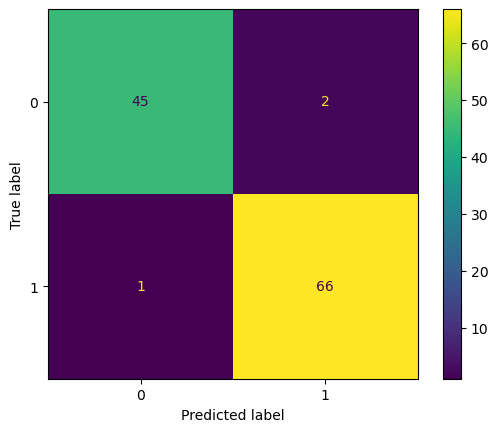

SVC(random_state=0)의 precision: 0.971
SVC(random_state=0)의 recall: 0.985
--------------------------------------------------
LogisticRegression(random_state=0)


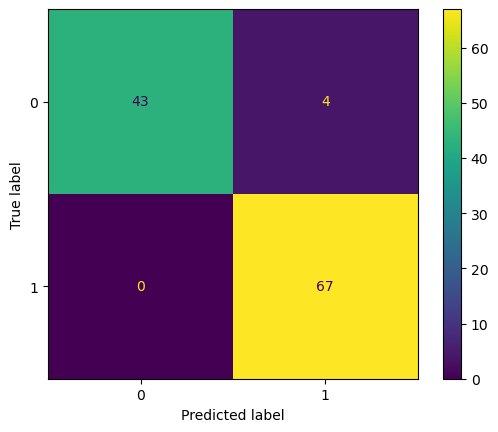

LogisticRegression(random_state=0)의 precision: 0.944
LogisticRegression(random_state=0)의 recall: 1.0
--------------------------------------------------


In [6]:
# 과제 2
# 다음 confusion matrix는 여러 알고리즘이 유방암 데이터를 학습하고 예측한 결과이다.
# 본인이 유방암을 분류하기 위한 모형을 만들 때, 어떤 모형을 선택할지와 근거를 제시하라.
# 단, 양성 판정을 Positive, 음성 판정을 Negative로 가정한다.

for i in [dt_clf, svm_clf, lr_clf]:
    print(i)
    ConfusionMatrixDisplay.from_estimator(i, X_test, y_test)
    plt.show()
    
    print(f'{i}의 precision: {round(precision_score(y_test, i.predict(X_test)), 3)}')
    print(f'{i}의 recall: {round(recall_score(y_test, i.predict(X_test)), 3)}')
    
    print('-'*50)

## 과제 2

- 선택하는 모형: \~\~\~\~\~\~\~\~\~\~
- 선택한 이유: \~\~\~\~\~\~\~\~\~\~

# 과제 3, 4

In [7]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'\
          .format(accuracy , precision ,recall))

In [8]:
# Threshold 결정
custom_threshold = 0.5

# pred_proba: lr.predict()와 유사 / 반환 결과는 예측 확률 결과
pred_proba = lr_clf.predict_proba(X_test)
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print(pred_proba_1)

[[1.56203080e-01]
 [8.88929350e-01]
 [9.63214177e-01]
 [9.24748356e-01]
 [9.80921077e-01]
 [9.49360597e-01]
 [9.51766668e-01]
 [9.70383985e-01]
 [9.95567605e-01]
 [9.93800975e-01]
 [6.74248577e-01]
 [8.31765087e-01]
 [9.94249495e-01]
 [6.75725041e-01]
 [6.09711919e-01]
 [1.60356908e-01]
 [9.38108152e-01]
 [1.11485523e-02]
 [2.70518845e-02]
 [1.74117248e-03]
 [2.35424734e-01]
 [1.28340474e-01]
 [8.59245574e-01]
 [9.67372395e-01]
 [2.42871847e-02]
 [9.76465257e-01]
 [9.94177525e-01]
 [7.88838318e-02]
 [9.57865726e-01]
 [1.05176401e-02]
 [9.91640133e-01]
 [4.46255658e-02]
 [7.59409253e-01]
 [1.58635264e-01]
 [9.98001793e-01]
 [1.76306173e-01]
 [9.21818444e-01]
 [1.34877579e-01]
 [9.10282579e-01]
 [1.53173833e-01]
 [5.63007922e-01]
 [9.95208495e-01]
 [4.95772371e-01]
 [9.92944675e-01]
 [6.75313547e-01]
 [2.03112326e-03]
 [9.98766982e-01]
 [8.93262184e-01]
 [9.72253011e-01]
 [3.45766559e-02]
 [1.55326590e-02]
 [2.10264755e-01]
 [5.18131096e-02]
 [9.62613358e-01]
 [9.49753156e-01]
 [9.782864

In [9]:
# threshold 기준값보다 같거나 작으면 0, 크면 1을 반환
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)

custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차 행렬
[[43  4]
 [ 0 67]]
정확도: 0.9649, 정밀도: 0.9437, 재현율: 1.0000


## 과제 3

In [10]:
# 과제 3
# threshold를 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7으로 설정해서 결과값을 보이시오

******************

Threshold: 0.35일 때, 결과값
오차 행렬
[[41  6]
 [ 0 67]]
정확도: 0.9474, 정밀도: 0.9178, 재현율: 1.0000
--------------------------------------------------
Threshold: 0.4일 때, 결과값
오차 행렬
[[41  6]
 [ 0 67]]
정확도: 0.9474, 정밀도: 0.9178, 재현율: 1.0000
--------------------------------------------------
Threshold: 0.45일 때, 결과값
오차 행렬
[[41  6]
 [ 0 67]]
정확도: 0.9474, 정밀도: 0.9178, 재현율: 1.0000
--------------------------------------------------
Threshold: 0.5일 때, 결과값
오차 행렬
[[43  4]
 [ 0 67]]
정확도: 0.9649, 정밀도: 0.9437, 재현율: 1.0000
--------------------------------------------------
Threshold: 0.55일 때, 결과값
오차 행렬
[[43  4]
 [ 1 66]]
정확도: 0.9561, 정밀도: 0.9429, 재현율: 0.9851
--------------------------------------------------
Threshold: 0.6일 때, 결과값
오차 행렬
[[46  1]
 [ 1 66]]
정확도: 0.9825, 정밀도: 0.9851, 재현율: 0.9851
--------------------------------------------------
Threshold: 0.65일 때, 결과값
오차 행렬
[[46  1]
 [ 3 64]]
정확도: 0.9649, 정밀도: 0.9846, 재현율: 0.9552
--------------------------------------------------
Threshold: 0.7일 때, 결과값
오차 행렬
[[46  1]

## 과제 4 (선택)

- 보험사가 위 모형에 기초한 유방암 보험을 만든다고 생각하자. 
- 이 경우, 보험사는 어떤 Threshold를 선택해야 할까?

- Hint: 보험사가 음성인 사람을 양성으로 예측하는 경우가 많아지면(FP ↑) 지급준비금이 증가한다.\
반면 양성인 사람을 음성으로 예측하는 경우가 많아지면(FN ↑) 예기치 못한 지출이 많아진다.

- 단, 유방암이 양성일 때 Positive, 음성일 때 Negative이다

- 선택한 Threshold: \~\~\~\~\~\~\~\~\~\~
- 해당 Threshold를 선택한 이유: \~\~\~\~\~\~\~\~\~\~\~\~\~\~\~\~